In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
import warnings
import tqdm


In [3]:
data = pd.read_csv('data.csv',index_col=0)
data = data.set_index(data.timestamp)

In [4]:
# evaluate an ARIMA model for a given order (p,d,q)

def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [5]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [6]:
# # evaluate parameters
# p_values = range(0, 1)
# d_values = range(0, 1)
# q_values = range(0, 1)
# warnings.filterwarnings("ignore")
# evaluate_models(data, p_values, d_values, q_values)

### SEASONAL ARIMA

In [7]:
from plotly.offline import plot_mpl,iplot
from statsmodels.tsa.seasonal import seasonal_decompose


In [8]:
data = pd.read_csv('data.csv',index_col=0)
data = data.set_index(data.timestamp)
len(data)

207689

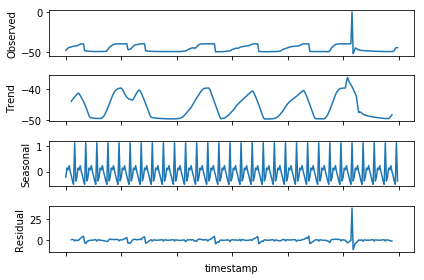

In [9]:
result = seasonal_decompose(data.x[0:300].interpolate(), model='additive',freq = 10)
fig = result.plot()
# plot_mpl(fig)

In [42]:
### Drop rows with any values zero
data = data[(data != 0).all(1)]
len(data)

207639

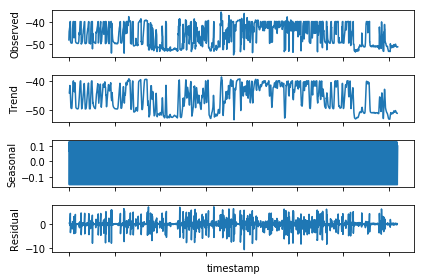

In [43]:
result = seasonal_decompose(data.x[0:3600].interpolate(), model='additive',freq = 10)
fig = result.plot()
# plot_mpl(fig)

#### From above plot, we see clear seasonlity in data with random walking trend(there is no trend in data)

##### Hence we can apply algorithms that support seasonality, ARIMA OR SARIMA
##### For random walk trend, d - 0; We dont need differencing i assume;
##### Residual errors are reasonably good; Add the residual errors with the predicted time series to get better accuracy over prediction

In [44]:
### GRID HYPERPARAMETER SEARCH FOR ARIMA MODELS
import pyramid
from pyramid.arima import auto_arima


In [65]:
stepwise_model = auto_arima(data.x[0:1000], seasonal=True,
                           trace=True,m= 12,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

# p - 
# q -
# d -
# P -
# Q - 
# D -
# m - 
print(stepwise_model.aic())

Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=43271.701, BIC=43286.275, Fit time=0.540 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=43220.724, BIC=43249.872, Fit time=6.318 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=43217.250, BIC=43246.399, Fit time=8.020 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=43216.100, BIC=43252.536, Fit time=20.987 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 0, 12); AIC=43216.951, BIC=43246.100, Fit time=6.987 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 2, 12); AIC=43215.973, BIC=43259.696, Fit time=74.814 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 2, 12); AIC=43213.077, BIC=43264.088, Fit time=64.264 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 2, 12); AIC=43219.750, BIC=43263.473, Fit time=75.916 seconds
Fit ARIMA: order=(1,

### The model with best AIC and BIC fit is ARIMA(1,1,2)

### Train and Test split

In [46]:
data.head()

,address,x,y,z,timestamp
timestamp,,,,,
2018-07-01 00:55:41.678,-6196490120761152012,-47.9602,-59.9457,6.24468,2018-07-01 00:55:41.678
2018-07-01 00:55:42.923,-6196490120761152012,-46.4965,-60.0888,6.25606,2018-07-01 00:55:42.923
2018-07-01 00:55:44.163,-6196490120761152012,-45.1626,-60.3775,6.46899,2018-07-01 00:55:44.163
2018-07-01 00:55:45.412,-6196490120761152012,-44.1827,-60.4705,6.57457,2018-07-01 00:55:45.412
2018-07-01 00:55:46.704,-6196490120761152012,-43.9995,-60.4705,6.58655,2018-07-01 00:55:46.704


In [55]:
data.tail(10000)

,address,x,y,z,timestamp
timestamp,,,,,
2018-09-28 13:53:00.052,-6196490120761152012,-45.2457,-43.5710,1.302590,2018-09-28 13:53:00.052
2018-09-28 13:53:01.375,-6196490120761152012,-45.3037,-45.5482,1.361350,2018-09-28 13:53:01.375
2018-09-28 13:53:02.717,-6196490120761152012,-45.3037,-46.4647,1.502140,2018-09-28 13:53:02.717
2018-09-28 13:53:04.021,-6196490120761152012,-45.3037,-46.5206,1.762230,2018-09-28 13:53:04.021
2018-09-28 13:53:05.330,-6196490120761152012,-45.3037,-46.5206,1.996230,2018-09-28 13:53:05.330
2018-09-28 13:53:06.631,-6196490120761152012,-45.3037,-46.5206,2.257230,2018-09-28 13:53:06.631
2018-09-28 13:53:11.823,-6196490120761152012,-45.3037,-46.5206,2.149460,2018-09-28 13:53:11.823
2018-09-28 13:53:13.120,-6196490120761152012,-45.3011,-46.5206,2.149460,2018-09-28 13:53:13.120
2018-09-28 13:53:15.703,-6196490120761152012,-45.3011,-46.5206,2.190320,2018-09-28 13:53:15.703


In [66]:
train = data.loc['2018-07-01':'2018-09-27']
test = data.loc['2018-09-28':]

In [67]:
### Rows with any values zero will be discarded; 



In [68]:
test = test[:-3]

In [69]:
print(len(train),len(test))

193386 12505


#### Fit the model using training data

In [ ]:
stepwise_model.fit(train.x)

#### Predict the future values

In [61]:
future_forecast = stepwise_model.predict(n_periods=12505)

In [62]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction_x'])


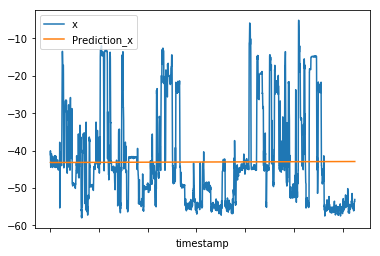

In [63]:
pd.concat([test.x,future_forecast],axis=1).plot()

C:\Users\saran\AppData\Local\conda\conda\envs\py35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




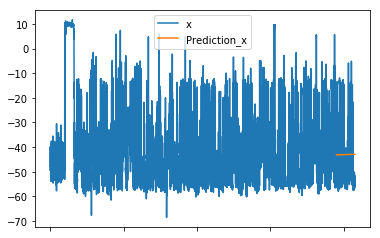

In [64]:
pd.concat([data.x,future_forecast],axis=1).plot()